In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import copy
import datetime as dt
import calendar
import seaborn as sns
import regionmask
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib as mpl

In [110]:
def covariance(x,y,dim=None):
    return xr.dot(x-x.mean(dim), y-y.mean(dim), dims=dim) / x.count(dim)


def correlation(x,y,dim=None):
    return covariance(x,y,dim) / (x.std(dim) * y.std(dim))

In [3]:
# Load files CMIP5

pr_c5_hist = xr.open_mfdataset('NorESM1-M/pr_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_anu.nc',
                              combine='nested',
                              concat_dim='r')['pr']
pr_c5_ens = pr_c5_hist.mean(dim='r', keep_attrs=True)
pr_c5_26_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                                )['pr']
pr_c5_26_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                                )['pr']
pr_c5_85_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                                )['pr']
pr_c5_85_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                                )['pr']

# """"""""""""""""""""""""""""""""""""""""""
ev_c5_hist = xr.open_mfdataset('NorESM1-M/evspsbl_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_anu.nc',
                               combine='nested',
                               concat_dim='r')['evspsbl']
ev_c5_ens = ev_c5_hist.mean(dim='r', keep_attrs=True)
ev_c5_26_close = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                                )['evspsbl']
ev_c5_26_far   = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                                )['evspsbl']
ev_c5_85_close = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                                )['evspsbl']
ev_c5_85_far   = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                                )['evspsbl']
# """"""""""""""""""""""""""""""""""""""""""
ep_c5_hist = xr.open_mfdataset('NorESM1-M/etp_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_anu.nc',
                               combine='nested',
                               concat_dim='r')['etp']
ep_c5_ens = ep_c5_hist.mean(dim='r', keep_attrs=True)
ep_c5_26_close = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                                )['etp']
ep_c5_26_far   = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                                )['etp']
ep_c5_85_close = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                                )['etp']
ep_c5_85_far   = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                                )['etp']
# """"""""""""""""""""""""""""""""""""""""""""

t_c5_hist = xr.open_mfdataset('NorESM1-M/tas_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_anu.nc',
                              combine='nested',
                              concat_dim='r')['tas']
t_c5_ens = t_c5_hist.mean(dim='r', keep_attrs=True)
t_c5_26_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                               )['tas']
t_c5_26_far   = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                               )['tas']
t_c5_85_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                               )['tas']
t_c5_85_far   = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                               )['tas']
# """"""""""""""""""""""""""""""""""""""
q_c5_hist = xr.open_mfdataset('NorESM1-M/huss_historical_r*_anu.nc',
                            combine='nested',
                            concat_dim='r')['huss']
q_c5_ens = q_c5_hist.mean(dim='r', keep_attrs=True)
q_c5_26_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_202001-204912_2.5_anu.nc'
                               )['huss']
q_c5_26_far   = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_207001-209912_2.5_anu.nc'
                               )['huss']
q_c5_85_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_202001-204912_2.5_anu.nc'
                               )['huss']
q_c5_85_far   = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_207001-209912_2.5_anu.nc'
                               )['huss']

In [4]:
# Load files CMIP6
pr_c6_hist = xr.open_mfdataset('NorESM2-LM/pr_Amon_NorESM2-LM_historical_r*_2.5_anu.nc',
                              combine='nested',
                              concat_dim='r')['pr']
pr_c6_ens = pr_c6_hist.mean(dim='r', keep_attrs=True)
pr_c6_126_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_anu.nc',
                                 )['pr']
pr_c6_126_far   = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_anu.nc'
                                 )['pr']
pr_c6_585_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5_anu.nc'
                                 )['pr']
pr_c6_585_far   = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5_anu.nc'
                                 )['pr']
# """"""""""""""""""""""""""""""""""""""
mes_pr_c6_hist = xr.open_mfdataset('NorESM2-LM/pr_Amon_NorESM2-LM_historical_r*_2.5_mes.nc',
                              combine='nested',
                              concat_dim='r')['pr']
mes_pr_c6_ens = pr_c6_hist.mean(dim='r', keep_attrs=True)
mes_pr_c6_126_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_mes.nc',
                                 )['pr']
mes_pr_c6_126_far   = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_mes.nc'
                                 )['pr']
mes_pr_c6_585_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5_mes.nc'
                                 )['pr']
mes_pr_c6_585_far   = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5_mes.nc'
                                 )['pr']
# """"""""""""""""""""""""""""""""""""""
ev_c6_hist = xr.open_mfdataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_historical_r*_2.5_anu.nc',
                               combine='nested',
                               concat_dim='r')['evspsbl']
ev_c6_ens = ev_c6_hist.mean(dim='r', keep_attrs=True)
ev_c6_126_close = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_anu.nc'
                                 )['evspsbl']
ev_c6_126_far   = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_anu.nc'
                                 )['evspsbl']
ev_c6_585_close = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_2020-2049_2.5_anu.nc'
                                 )['evspsbl']
ev_c6_585_far   = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_2070-2099_2.5_anu.nc'
                                 )['evspsbl']
# """"""""""""""""""""""""""""""""""""""
mes_ev_c6_hist = xr.open_mfdataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_historical_r*_2.5_mes.nc',
                               combine='nested',
                               concat_dim='r')['evspsbl']
mes_ev_c6_ens = ev_c6_hist.mean(dim='r', keep_attrs=True)
mes_ev_c6_126_close = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_mes.nc'
                                 )['evspsbl']
mes_ev_c6_126_far   = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_mes.nc'
                                 )['evspsbl']
mes_ev_c6_585_close = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_2020-2049_2.5_mes.nc'
                                 )['evspsbl']
mes_ev_c6_585_far   = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_2070-2099_2.5_mes.nc'
                                 )['evspsbl']
# """"""""""""""""""""""""""""""""""""""
ep_c6_hist = xr.open_mfdataset('NorESM2-LM/etp_Amon_NorESM2-LM_historical_r*_2.5_anu.nc',
                               combine='nested',
                               concat_dim='r')['etp']
ep_c6_ens = ep_c6_hist.mean(dim='r', keep_attrs=True)
ep_c6_126_close = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_anu.nc'
                                 )['etp']
ep_c6_126_far   = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_anu.nc'
                                 )['etp']
ep_c6_585_close = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5_anu.nc'
                                 )['etp']
ep_c6_585_far   = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5_anu.nc'
                                 )['etp']
# """"""""""""""""""""""""""""""""""""""
t_c6_hist = xr.open_mfdataset('NorESM2-LM/tas_Amon_NorESM2-LM_historical_r*_2.5_anu.nc',
                              combine='nested',
                              concat_dim='r')['tas']
t_c6_ens = t_c6_hist.mean(dim='r', keep_attrs=True)
t_c6_126_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_anu.nc'
                                )['tas']
t_c6_126_far   = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_anu.nc'
                                )['tas']
t_c6_585_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5_anu.nc'
                                )['tas']
t_c6_585_far   = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5_anu.nc'
                                )['tas']
# """"""""""""""""""""""""""""""""""""""
q_c6_hist = xr.open_mfdataset('NorESM2-LM/huss_Amon_NorESM2-LM_historical_r*_2.5.nc',
                              combine='nested',
                              concat_dim='r')['huss']
q_c6_ens = q_c6_hist.mean(dim='r', keep_attrs=True)
q_c6_126_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc'
                                )['huss']
q_c6_126_far   = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc'
                                )['huss']
q_c6_585_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc'
                                )['huss']
q_c6_585_far   = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc'
                                )['huss']
# """"""""""""""""""""""""""""""""""""""

In [5]:
pr_observ = xr.open_dataset('observacionales/precip.mon.total.v7_197601-200512_2.5_anu.nc')
mask_land = 1 * np.ones((pr_observ.dims['lat'], pr_observ.dims['lon'])) * np.isfinite(
               pr_observ.precip.isel(time=0))
del pr_observ


Defino el cálculo de $\Gamma = \frac{\sum_{i=1}^N P_iE_i}{\sum_{i=1}^N P_i^2}$ para un mes

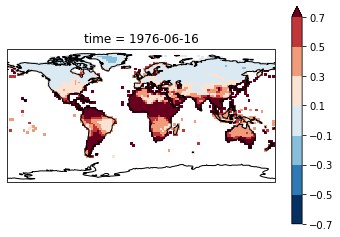

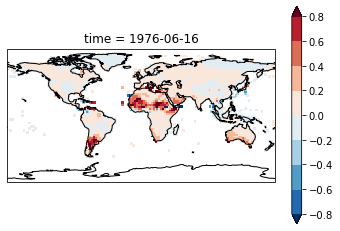

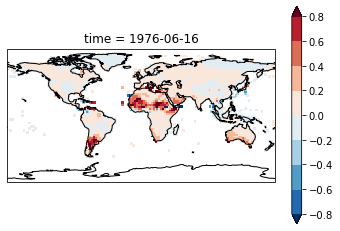

In [127]:
def gamma_ind(p, e, **kwargs):
    """"""
    
    month = kwargs.get('month', None)
    season = kwargs.get('season', None)
    if month:
        p = p.sel(time = p['time.month']==month)
        e = e.sel(time = e['time.month']==month)
    elif season:
        p = p.rolling(time=3, center=True).mean().dropna('time')
        display(p)
        e = e.rolling(time=3, center=True).mean().dropna('time')
        display(e)
    numerador_i = (p * e)
    denominador_i = (p * p)
    return numerador_i.sum(dim='time') / denominador_i.sum(dim='time')

def season_index(p, e, **kwargs):
    """Calcula correlacion,
    desvío estándar, gamma con
    las """
    
    month = kwargs.get('month', None)
    season = kwargs.get('season', None)
    
    if month:
        p = p.sel(time = p['time.month']==month)
        e = e.sel(time = e['time.month']==month)
    elif season:
        p = p.rolling(time=3, center=True).mean().dropna('time')
        display(p)
        e = e.rolling(time=3, center=True).mean().dropna('time')
        display(e)
    numerador_i = (p * e)
    denominador_i = (p * p)
    
    corr = correlation(p, e, dim='time')
    stdev_p = p.std(dim='time')
    stdev_e = e.std(dim='time')
    gamma_std = correlation(p, e) * e.std(dim='time') / p.std(dim='time')
    gamma_id = numerador_i.sum(dim='time') / denominador_i.sum(dim='time')
    return 

ax = plt.axes(projection=ccrs.PlateCarree())
a = gamma_ind(p, e, month=1)
ax.coastlines()
a.where(mask_land == 1).plot(vmax=0.7, levels=8)
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
a = correlation(p.sel(time = p['time.month']==1), e.sel(time = e['time.month']==1),
                dim='time') * e.sel(time = e['time.month']==1).std(
                dim='time') / p.sel(time = p['time.month']==1).std(dim='time') 
a.where(mask_land == 1).plot(vmax=0.8, levels=9)
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
a = correlation(e.sel(time = e['time.month']==1), p.sel(time = p['time.month']==1),
                dim='time') * e.sel(time = e['time.month']==1).std(
                dim='time') / p.sel(time = p['time.month']==1).std(dim='time') 
a.where(mask_land == 1).plot(vmax=0.8, levels=9)
ax.coastlines()
plt.show()
def sel_month(da, month):
    return da.sel(time = da['time.month']==month)

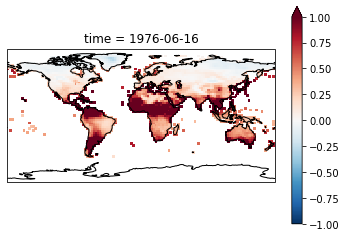

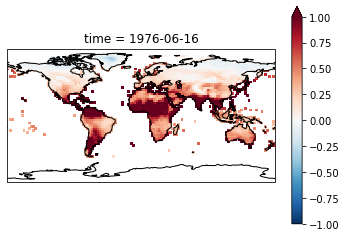

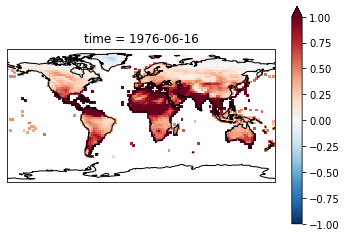

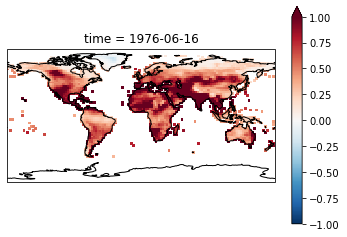

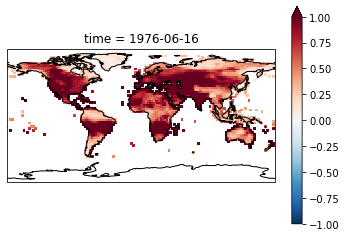

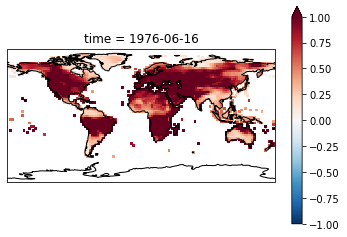

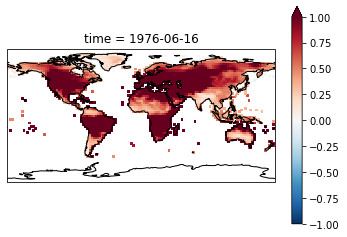

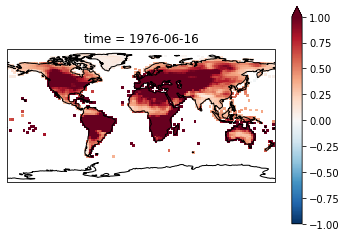

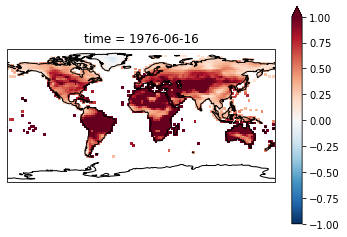

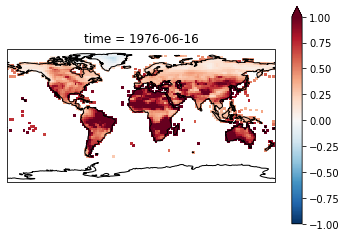

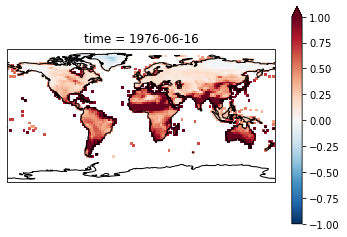

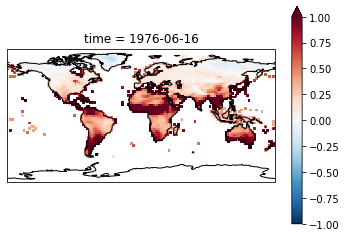

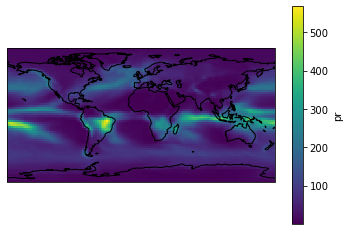

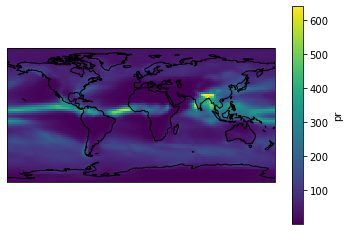

<xarray.DataArray (time: 29, lat: 73, lon: 144)>
array([[[ 4.591508 ,  4.591508 ,  4.591508 , ...,  4.5897074,
          4.590192 ,  4.59027  ],
        [ 5.8487487,  6.0530834,  6.0600595, ...,  5.24424  ,
          5.4989424,  5.652761 ],
        [ 7.645193 ,  7.5653033,  7.561405 , ...,  8.49164  ,
          7.9534063,  7.773629 ],
        ...,
        [15.5534315, 14.979442 , 14.911072 , ..., 16.041441 ,
         16.170065 , 15.949644 ],
        [16.411346 , 16.954657 , 16.97035  , ..., 14.759372 ,
         15.433798 , 15.895679 ],
        [14.528063 , 14.528063 , 14.528063 , ..., 14.52429  ,
         14.523832 , 14.524487 ]],

       [[ 4.046709 ,  4.046709 ,  4.046709 , ...,  4.0463142,
          4.046441 ,  4.04652  ],
        [ 5.793796 ,  5.6541977,  5.649783 , ...,  6.1233063,
          5.9971495,  5.905805 ],
        [ 4.979165 ,  5.089332 ,  5.11362  , ...,  6.127441 ,
          5.2790833,  5.034458 ],
        ...,
        [20.439865 , 20.12563  , 20.092983 , ..., 20.642502 ,
         20.860289 , 20.717443 ],
        [10.919399 , 11.140765 , 11.147709 , ..., 10.169317 ,
         10.530118 , 10.71978  ],
        [10.574152 , 10.574152 , 10.574152 , ..., 10.567233 ,
         10.566862 , 10.567992 ]],

       [[ 6.1757255,  6.1757255,  6.1757255, ...,  6.175693 ,
          6.1758537,  6.175829 ],
        [ 5.894811 ,  5.9945755,  5.997775 , ...,  5.515712 ,
          5.7188373,  5.8093867],
        [ 8.936017 ,  8.56141  ,  8.523948 , ...,  9.742657 ,
          9.326763 ,  9.171961 ],
        ...,
        [14.170532 , 14.624754 , 14.669584 , ..., 12.103111 ,
         13.15979  , 13.695902 ],
        [10.729926 , 10.894962 , 10.900448 , ..., 10.302639 ,
         10.469684 , 10.590574 ],
        [ 8.828795 ,  8.828795 ,  8.828795 , ...,  8.824102 ,
          8.823273 ,  8.823888 ]],

       ...,

       [[ 3.363625 ,  3.363625 ,  3.363625 , ...,  3.3630292,
          3.3632896,  3.3633494],
        [ 4.3318653,  4.3640304,  4.3649898, ...,  4.3404365,
          4.345382 ,  4.330246 ],
        [ 6.741594 ,  6.1940947,  6.166897 , ...,  5.9594584,
          7.0754104,  7.1474833],
        ...,
        [17.724197 , 16.771883 , 16.659512 , ..., 19.948673 ,
         19.152723 , 18.494812 ],
        [12.408386 , 12.767843 , 12.779178 , ..., 11.234019 ,
         11.785438 , 12.085116 ],
        [12.442396 , 12.442396 , 12.442396 , ..., 12.43566  ,
         12.435272 , 12.436178 ]],

       [[ 3.3952255,  3.3952255,  3.3952255, ...,  3.3936806,
          3.3938813,  3.394219 ],
        [ 3.7576396,  3.758121 ,  3.7580085, ...,  3.9015663,
          3.783097 ,  3.7619514],
        [ 2.5498428,  2.4164195,  2.406095 , ...,  3.559159 ,
          2.928518 ,  2.6940458],
        ...,
        [23.77062  , 22.877325 , 22.784416 , ..., 26.956778 ,
         25.524517 , 24.666798 ],
        [13.544756 , 13.650869 , 13.654033 , ..., 13.096756 ,
         13.316162 , 13.429732 ],
        [12.061562 , 12.061562 , 12.061562 , ..., 12.054853 ,
         12.054198 , 12.054873 ]],

       [[ 3.833058 ,  3.833058 ,  3.833058 , ...,  3.8321216,
          3.832281 ,  3.832463 ],
        [ 5.1461525,  5.1264796,  5.126119 , ...,  5.3283443,
          5.220383 ,  5.1739087],
        [ 5.7479434,  5.537902 ,  5.5119605, ...,  6.8727846,
          6.2022204,  5.9684234],
        ...,
        [15.968646 , 15.553924 , 15.511253 , ..., 18.689972 ,
         17.169754 , 16.477987 ],
        [ 8.72592  ,  8.683272 ,  8.682262 , ...,  9.101179 ,
          8.872534 ,  8.783957 ],
        [ 8.478699 ,  8.478699 ,  8.478699 , ...,  8.477245 ,
          8.476641 ,  8.476802 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) object 2021-01-16 12:00:00 ... 2049-01-16 12:00:00

In [70]:
p, e = mes_pr_c6_126_close, mes_ev_c6_126_close
p1 = p.sel(time = p['time.month']==1)
p7 = p.sel(time = p['time.month']==7)
ax = plt.axes(projection=ccrs.PlateCarree())
p1.mean(dim='time').plot()
ax.coastlines()
plt.show()
ax = plt.axes(projection=ccrs.PlateCarree())
p7.mean(dim='time').plot()
ax.coastlines()
plt.show()

p_av = p.rolling(time=3, center=True).mean().dropna('time')
display(p_av.sel(time = p_av['time.month']==1))
#correlation(p.sel(p.time.dt.month = 1), e.sel(e.time.dt.month = 1))

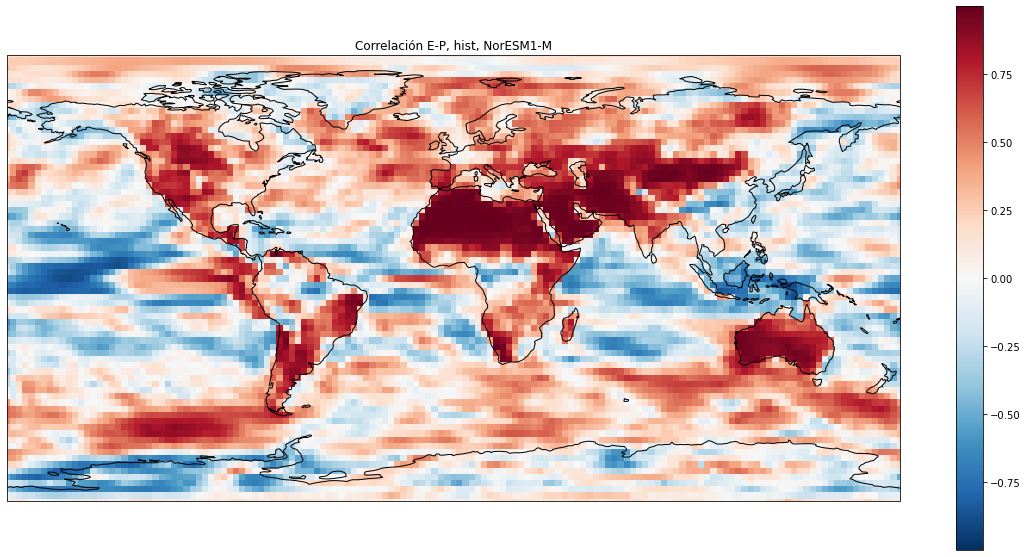

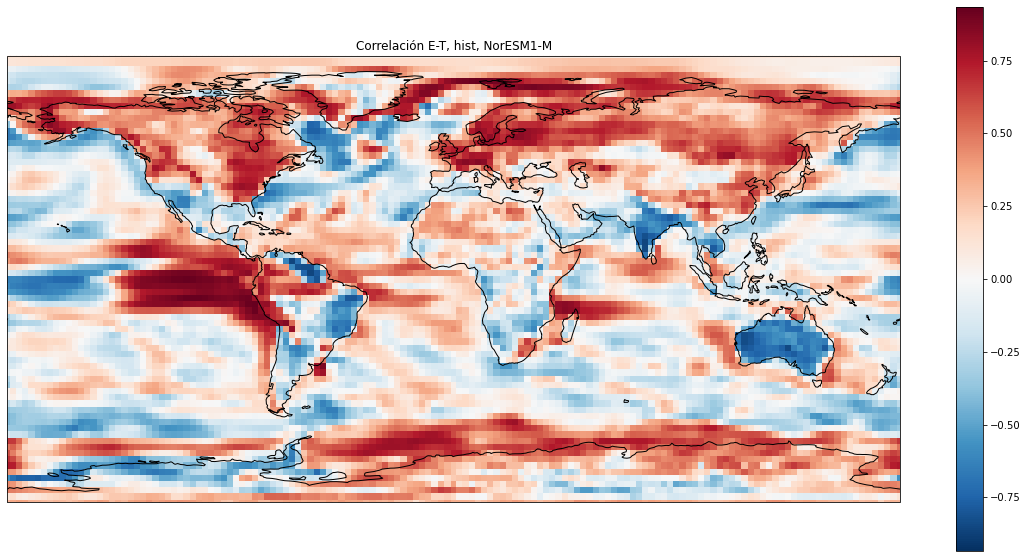

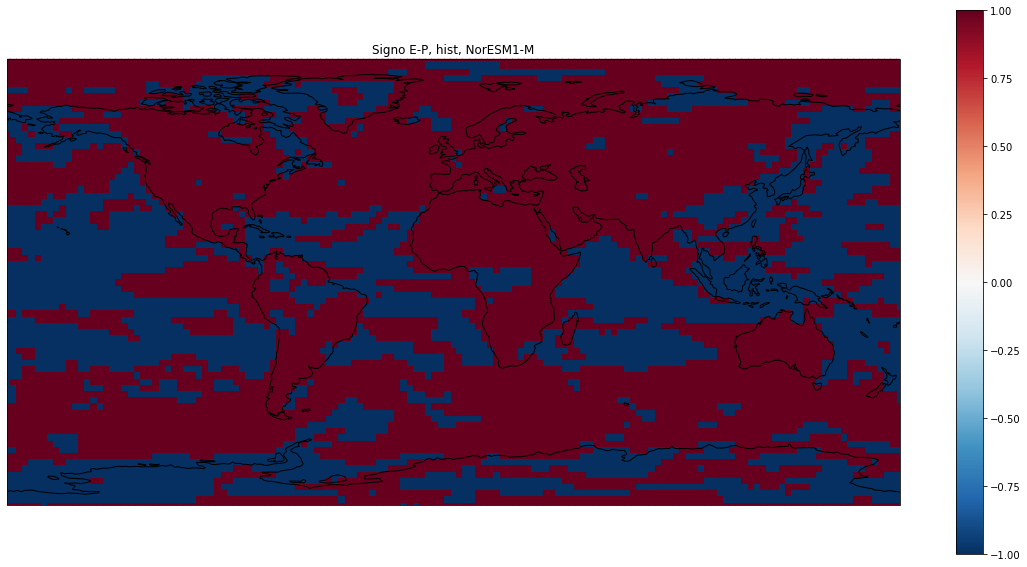

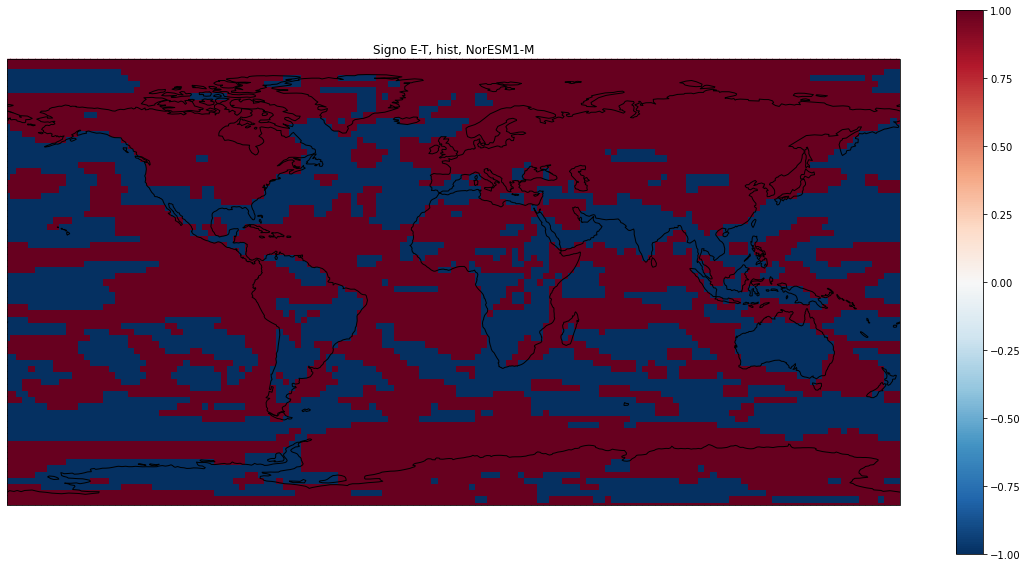

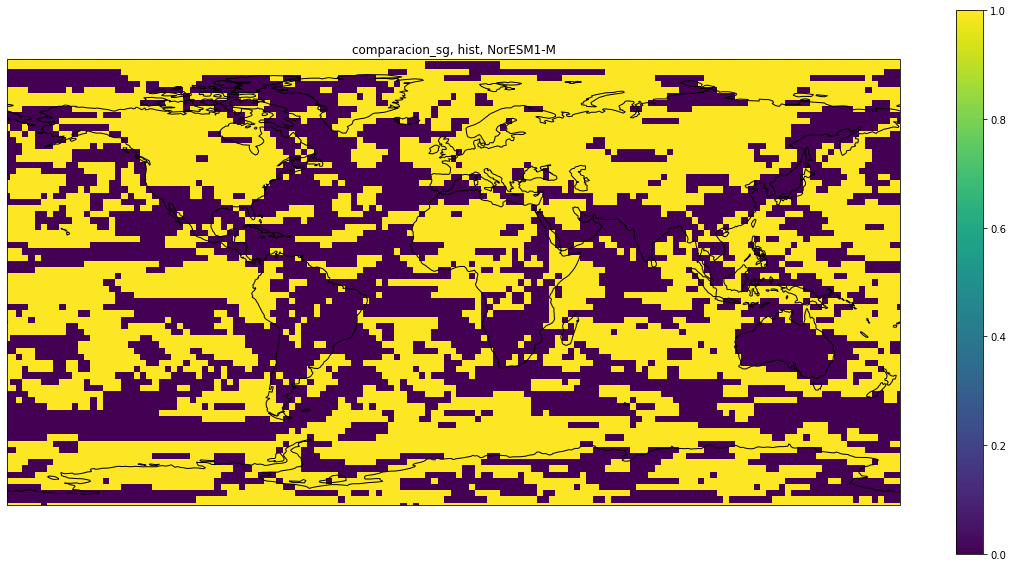

[[ True  True  True ...  True  True  True]
 [False False False ...  True  True False]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False False False ... False False False]
 [ True  True  True ...  True  True  True]]


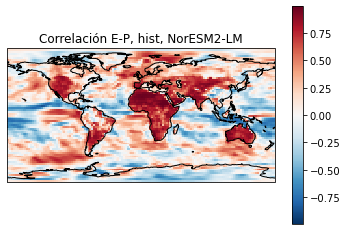

In [7]:
corr_e_p_hist_c5 = correlation(ev_c5_ens, pr_c5_ens, dims='time')
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
corr_e_p_hist_c5.plot(transform=ccrs.PlateCarree())
plt.title('Correlación E-P, hist, NorESM1-M')
ax.coastlines()
plt.show()

# corr_e_p_hist_c5 = correlation(ev_c5_ens, pr_c5_ens, dims='time')
# plt.figure(figsize=(20,10))
# ax = plt.axes(projection=ccrs.PlateCarree())
# cyclic, lon = add_cyclic_point(corr_e_p_hist_c5.values, corr_e_p_hist_c5.lon)
# plt.contourf(lon, corr_e_p_hist_c5.lat.values, cyclic, levels=50, transform=ccrs.PlateCarree(), cmap='RdBu_r')
# plt.colorbar()
# plt.title('Correlación E-P, hist, NorESM1-M')
# ax.coastlines()
# plt.show()

corr_e_t_hist_c5 = correlation(ev_c5_ens, t_c5_ens, dims='time')
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
corr_e_t_hist_c5.plot(transform=ccrs.PlateCarree())
plt.title('Correlación E-T, hist, NorESM1-M')
ax.coastlines()
plt.show()


signo1 = xr.ufuncs.sign(correlation(ev_c5_ens, pr_c5_ens, dims='time'))
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
signo1.plot(transform=ccrs.PlateCarree())
plt.title('Signo E-P, hist, NorESM1-M')
ax.coastlines()
plt.show()


signo2 = xr.ufuncs.sign(correlation(ev_c5_ens, t_c5_ens, dims='time'))
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
signo2.plot(transform=ccrs.PlateCarree())
plt.title('Signo E-T, hist, NorESM1-M')
ax.coastlines()
plt.show()

comparacion_sg = (signo1 == signo2)
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
comparacion_sg.plot(transform=ccrs.PlateCarree())
plt.title('comparacion_sg, hist, NorESM1-M')
ax.coastlines()
plt.show()
print(comparacion_sg.values)

corr_e_p_hist_c6 = correlation(ev_c6_ens, pr_c6_ens, dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
corr_e_p_hist_c6.plot(transform=ccrs.PlateCarree())
plt.title('Correlación E-P, hist, NorESM2-LM')
ax.coastlines()
plt.show()

<xarray.DataArray (time: 30, lat: 73, lon: 144)>
dask.array<truediv, shape=(30, 73, 144), dtype=float32, chunksize=(30, 73, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) object 1976-07-01 06:00:00 ... 2005-07-01 06:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5


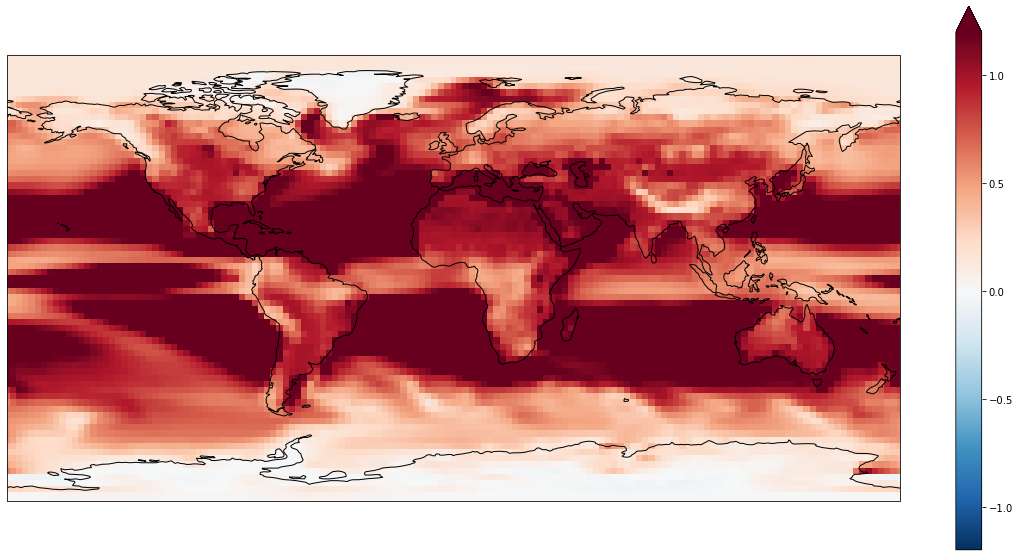

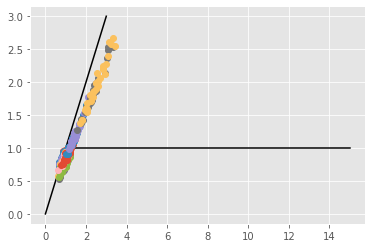

In [8]:
ev_p_hist_c5 = (ev_c5_hist.isel(r=2) / pr_c5_hist.isel(r=2))
ep_p_hist_c5 = (ep_c5_hist.isel(r=2) / pr_c5_hist.isel(r=2))

#print(ev_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest').values)

ev_p_c5_hist_caba = ev_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=-58.5, method='nearest')
ep_p_c5_hist_caba = ep_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=-58.5, method='nearest')

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
print(ev_p_hist_c5)
ev_p_hist_c5.mean(dim='time').plot(vmax=1.2)
ax.coastlines()
plt.show()


first = np.linspace(0,3,2)
second = np.linspace(1,15,2)
ones = np.ones(2)
with plt.style.context('ggplot'):
    plt.plot(first, first, color='k')
    plt.plot(second,ones, color='k')
    for i in range(20,26):
        for j in range(130,132):
            #print(ev_p_hist_c5.isel(lat=i).isel(lon=j).values)
            plt.plot(ep_p_hist_c5.isel(lat=i).isel(lon=j).values, ev_p_hist_c5.isel(lat=i).isel(lon=j).values, 'o')
       # print(ep_p_hist_c5.lat.isel(lat=i).values)

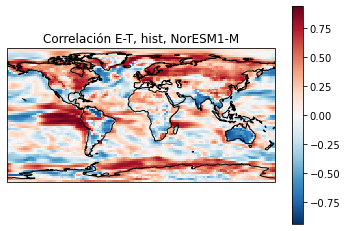

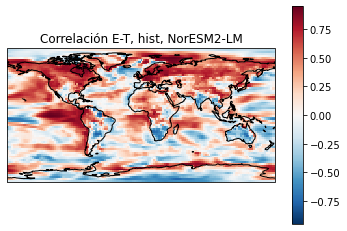

In [9]:
corr_e_t_hist_c5 = correlation(ev_c5_ens, t_c5_ens, dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
corr_e_t_hist_c5.plot(transform=ccrs.PlateCarree())
plt.title('Correlación E-T, hist, NorESM1-M')
ax.coastlines()
plt.show()

corr_e_t_hist_c6 = correlation(ev_c6_ens, t_c6_ens, dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
corr_e_t_hist_c6.plot(transform=ccrs.PlateCarree())
plt.title('Correlación E-T, hist, NorESM2-LM')
ax.coastlines()
plt.show()

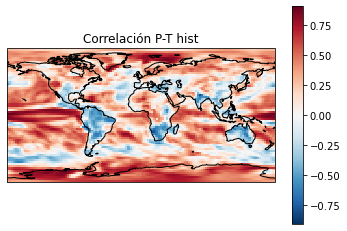

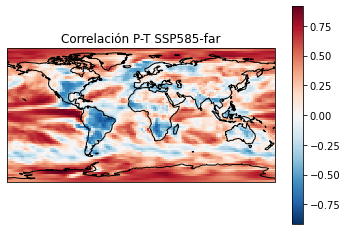

In [10]:
#corr_p_t_hist_c5 = correlation(pr_c5_ens, t_c5_ens, dims='time')
#ax = plt.axes(projection=ccrs.PlateCarree())
#corr_p_t_hist_c5.plot(transform=ccrs.PlateCarree())
#ax.coastlines()
#plt.show()

corr_p_t_hist_c6 = correlation(pr_c6_ens, t_c6_ens, dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
corr_p_t_hist_c6.plot(transform=ccrs.PlateCarree())
plt.title('Correlación P-T hist')
ax.coastlines()
plt.show()

corr_p_t_ssp585_far = correlation(pr_c6_585_far, t_c6_585_far, dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
corr_p_t_ssp585_far.plot(transform=ccrs.PlateCarree())
plt.title('Correlación P-T SSP585-far')
ax.coastlines()
plt.show()

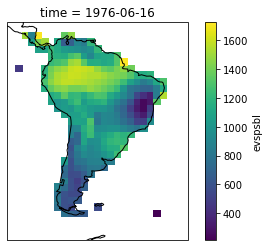

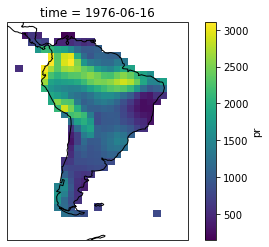

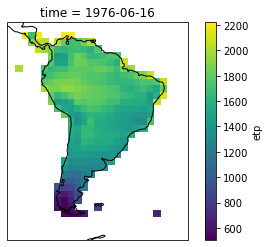

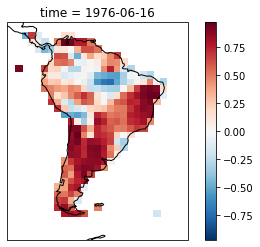

In [11]:
def sel_latlon(da, lat=slice(-60,14), lon=slice(270,330)):
    return da.sel(lat=lat).sel(lon=lon)

ev_sa_c5_hist = sel_latlon(ev_c5_ens)
ax = plt.axes(projection=ccrs.PlateCarree())
ev_sa_c5_hist.mean(dim='time').where(mask_land == 1).plot()
ax.coastlines()
plt.show()

pr_sa_c5_hist = sel_latlon(pr_c5_ens)
ax = plt.axes(projection=ccrs.PlateCarree())
pr_sa_c5_hist.mean(dim='time').where(mask_land == 1).plot()
ax.coastlines()
plt.show()

ep_sa_c5_hist = sel_latlon(ep_c5_ens)
ax = plt.axes(projection=ccrs.PlateCarree())
ep_sa_c5_hist.mean(dim='time').where(mask_land == 1).plot()
ax.coastlines()
plt.show()

corr = correlation(ev_sa_c5_hist, pr_sa_c5_hist, dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
corr.where(mask_land == 1).plot()
ax.coastlines()
plt.show()

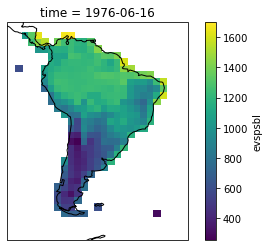

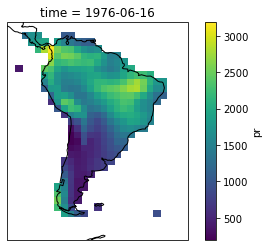

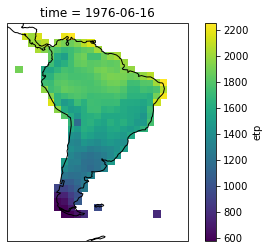

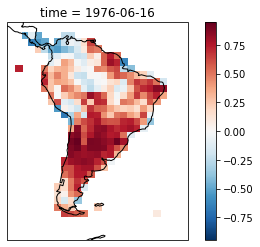

In [12]:
def sel_latlon(da, lat=slice(-60,14), lon=slice(270,330)):
    return da.sel(lat=lat).sel(lon=lon)

ev_sa_c6_hist = sel_latlon(ev_c6_ens)
ax = plt.axes(projection=ccrs.PlateCarree())
ev_sa_c6_hist.mean(dim='time').where(mask_land == 1).plot()
ax.coastlines()
plt.show()

pr_sa_c6_hist = sel_latlon(pr_c6_ens)
ax = plt.axes(projection=ccrs.PlateCarree())
pr_sa_c6_hist.mean(dim='time').where(mask_land == 1).plot()
ax.coastlines()
plt.show()

ep_sa_c5_hist = sel_latlon(ep_c6_ens)
ax = plt.axes(projection=ccrs.PlateCarree())
ep_sa_c5_hist.mean(dim='time').where(mask_land == 1).plot()
ax.coastlines()
plt.show()

corr = correlation(ev_sa_c6_hist, pr_sa_c6_hist, dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
corr.where(mask_land == 1).plot()
ax.coastlines()
plt.show()

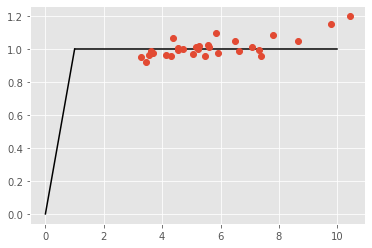

In [13]:
ev_p_hist_c5 = (ev_c5_hist.isel(r=2) / pr_c5_hist.isel(r=2))
ep_p_hist_c5 = (ep_c5_hist.isel(r=2) / pr_c5_hist.isel(r=2))

ev_p_c5_hist_caba = ev_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest')
ep_p_c5_hist_caba = ep_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest')

with plt.style.context('ggplot'):
    plt.plot([0,1], [0,1], color='k')
    plt.plot([1,10], [1,1], color='k')
    plt.plot(ep_p_c5_hist_caba, ev_p_c5_hist_caba, 'o')

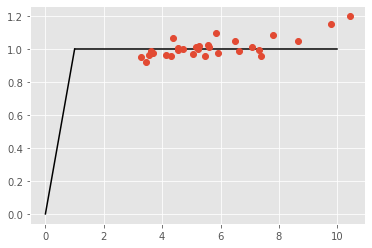

In [14]:
ev_p_hist_c5 = (ev_c5_hist.isel(r=2) / pr_c5_hist.isel(r=2))
ep_p_hist_c5 = (ep_c5_hist.isel(r=2) / pr_c5_hist.isel(r=2))

ev_p_c5_hist_caba = ev_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest')
ep_p_c5_hist_caba = ep_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest')

with plt.style.context('ggplot'):
    plt.plot([0,1], [0,1], color='k')
    plt.plot([1,10], [1,1], color='k')
    plt.plot(ep_p_c5_hist_caba, ev_p_c5_hist_caba, 'o')

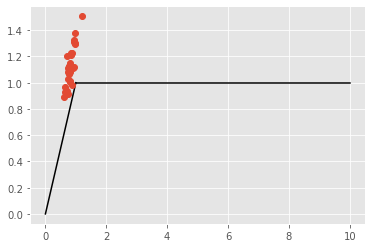

In [15]:
ev_p_hist_c6 = (ev_c6_hist.isel(r=2) / pr_c6_hist.isel(r=2))
ep_p_hist_c6 = (ep_c6_hist.isel(r=2) / pr_c6_hist.isel(r=2))

ev_p_c6_hist_caba = ev_p_hist_c6.sel(lat=34.5, method='nearest').sel(lon=300, method='nearest')
ep_p_c6_hist_caba = ep_p_hist_c6.sel(lat=34.5, method='nearest').sel(lon=300, method='nearest')

with plt.style.context('ggplot'):
    plt.plot([0,1], [0,1], color='k')
    plt.plot([1,10], [1,1], color='k')
    plt.plot(ep_p_c6_hist_caba, ev_p_c6_hist_caba, 'o')

<xarray.DataArray (time: 30, lat: 73, lon: 144)>
dask.array<truediv, shape=(30, 73, 144), dtype=float32, chunksize=(30, 73, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) object 1976-07-01 06:00:00 ... 2005-07-01 06:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5


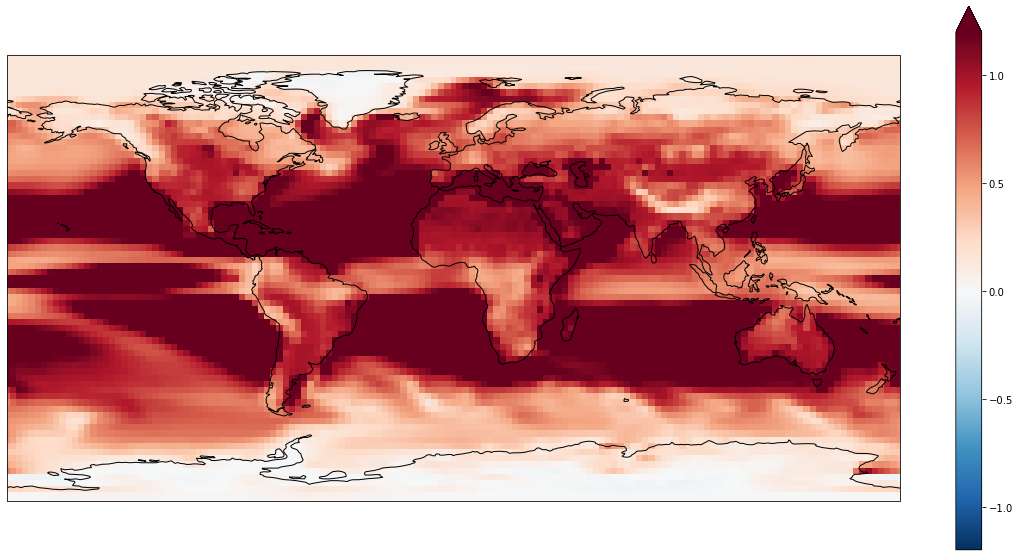

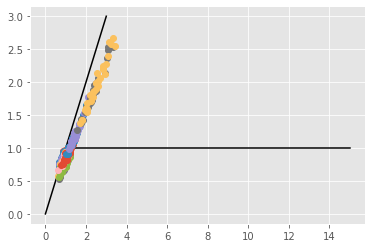

In [16]:
ev_p_hist_c5 = (ev_c5_hist.isel(r=2) / pr_c5_hist.isel(r=2))
ep_p_hist_c5 = (ep_c5_hist.isel(r=2) / pr_c5_hist.isel(r=2))

#print(ev_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest').values)

ev_p_c5_hist_caba = ev_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=-58.5, method='nearest')
ep_p_c5_hist_caba = ep_p_hist_c5.sel(lat=35.5, method='nearest').sel(lon=-58.5, method='nearest')

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
print(ev_p_hist_c5)
ev_p_hist_c5.mean(dim='time').plot(vmax=1.2)
ax.coastlines()
plt.show()


first = np.linspace(0,3,2)
second = np.linspace(1,15,2)
ones = np.ones(2)
with plt.style.context('ggplot'):
    plt.plot(first, first, color='k')
    plt.plot(second,ones, color='k')
    for i in range(20,26):
        for j in range(130,132):
            #print(ev_p_hist_c5.isel(lat=i).isel(lon=j).values)
            plt.plot(ep_p_hist_c5.isel(lat=i).isel(lon=j).values, ev_p_hist_c5.isel(lat=i).isel(lon=j).values, 'o')
       # print(ep_p_hist_c5.lat.isel(lat=i).values)

<xarray.DataArray (time: 30, lat: 73, lon: 144)>
dask.array<truediv, shape=(30, 73, 144), dtype=float32, chunksize=(30, 73, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) object 1976-07-01 06:00:00 ... 2005-07-01 06:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5


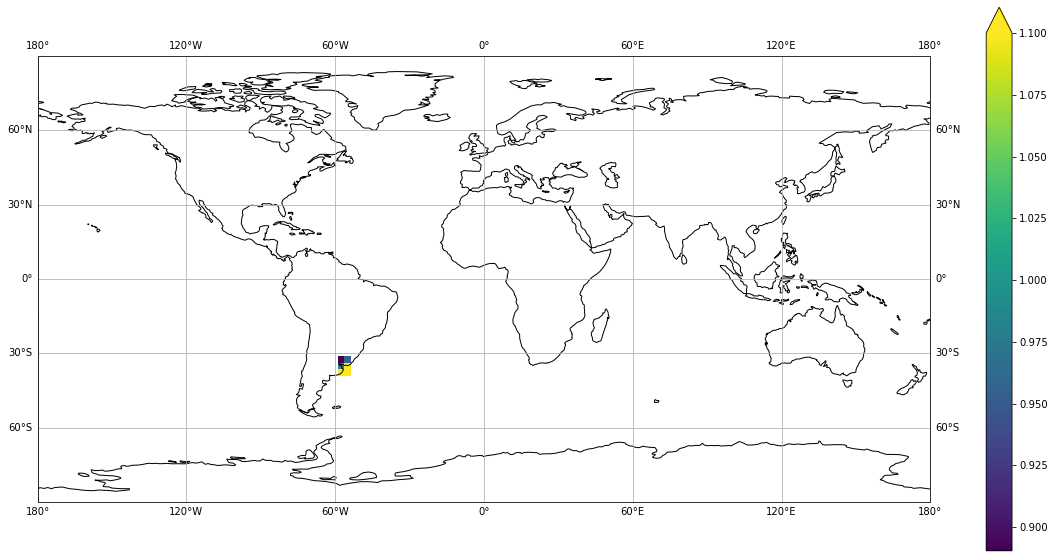

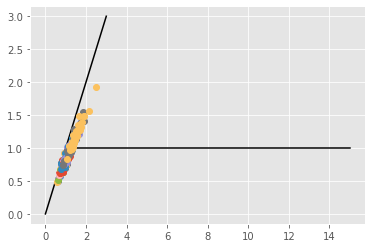

In [17]:
ev_p_hist_c6 = (ev_c6_hist.isel(r=2) / pr_c6_hist.isel(r=2))
ep_p_hist_c6 = (ep_c6_hist.isel(r=2) / pr_c6_hist.isel(r=2))

#print(ev_p_hist_c6.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest').values)

ev_p_c6_hist_caba = ev_p_hist_c6.sel(lat=35.5, method='nearest').sel(lon=-58.5, method='nearest')
ep_p_c6_hist_caba = ep_p_hist_c6.sel(lat=35.5, method='nearest').sel(lon=-58.5, method='nearest')

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
print(ev_p_hist_c6)
ev_p_hist_c6.mean(dim='time').where(ev_p_hist_c6.lat < -32).where(ev_p_hist_c6.lat > -38).where(
    ev_p_hist_c6.lon > 300).where(ev_p_hist_c6.lon < 306).plot(vmax=1.1)
ax.gridlines(draw_labels=True)
ax.coastlines()
plt.show()


first = np.linspace(0,3,2)
second = np.linspace(1,15,2)
ones = np.ones(2)
with plt.style.context('ggplot'):
    plt.plot(first, first, color='k')
    plt.plot(second,ones, color='k')
    for i in range(20,26):
        for j in range(130,132):
            #print(ev_p_hist_c6.isel(lat=i).isel(lon=j).values)
            plt.plot(ep_p_hist_c6.isel(lat=i).isel(lon=j).values, ev_p_hist_c6.isel(lat=i).isel(lon=j).values, 'o')
       # print(ep_p_hist_c6.lat.isel(lat=i).values)

[0.99197346 1.8551468  1.236727   1.0740793  1.125512   0.9954518
 1.12059    1.2163168  1.1678005  0.90786994 1.6778069  1.093649
 0.8663704  1.1554866  2.5345805  0.8307905  1.9827659  1.631762
 0.89023554 1.77816    0.9041357  1.9566289  1.0233854  1.195026
 1.1929965  1.3659927  0.9834582  1.3123404  1.4579695  1.8179376 ]
[0.94517565 0.9500642  0.9488804  0.81373876 0.8897866  0.85923016
 0.82438457 0.92931175 1.1130031  0.90395015 0.8903061  0.9122154
 0.9173144  0.9767097  1.1151665  0.82209677 1.1711276  0.9648284
 0.86407924 1.067714   0.96402615 0.8949337  0.8849201  1.0374126
 0.9901065  0.8459221  0.91174823 0.8914363  0.88514143 0.8822969 ]
[0.92621046 0.93482244 0.92493737 0.7678676  0.89587134 0.8917802
 0.8230242  0.9302798  1.1391587  0.86860365 0.90442044 0.90487707
 0.9149984  0.9575983  1.111714   0.80854315 1.1180353  0.93287146
 0.8275066  1.0779805  0.9551041  0.8754808  0.8412041  1.0268122
 1.0314814  0.846385   0.8946498  0.8570606  0.9000798  0.86665475]
[0.9

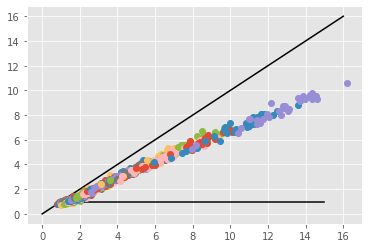

In [18]:
ev_p_hist_c6 = (ev_c6_hist.isel(r=2) / pr_c6_hist.isel(r=2))
ep_p_hist_c6 = (ep_c6_hist.isel(r=2) / pr_c6_hist.isel(r=2))

print(ev_p_hist_c6.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest').values)

ev_p_c6_hist_caba = ev_p_hist_c6.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest')
ep_p_c6_hist_caba = ep_p_hist_c6.sel(lat=35.5, method='nearest').sel(lon=58.2, method='nearest')


first = np.linspace(0,16,2)
second = np.linspace(1,15,2)
ones = np.ones(2)
with plt.style.context('ggplot'):
    plt.plot(first, first, color='k')
    plt.plot(second,ones, color='k')
    for i in range(20,26):
        for j in range(140,144):
            print(ev_p_hist_c6.isel(lat=i).isel(lon=j).values)
            plt.plot(ep_p_hist_c6.isel(lat=i).isel(lon=j).values, ev_p_hist_c6.isel(lat=i).isel(lon=j).values, 'o')
        print(ep_p_hist_c6.lat.isel(lat=i).values)